# loading dataset

In [73]:
import warnings

In [74]:
warnings.filterwarnings('ignore')

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")

In [76]:
df = pd.read_excel("Data_Train.xlsx")

In [77]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [78]:
df.shape

(10683, 11)

## feature engg and preprocessing

In [79]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [80]:
df.dropna(inplace = True)

In [81]:
df.shape

(10682, 11)

In [82]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [83]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [84]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [85]:
def change_to_datetime(col):
    df[col] = pd.to_datetime(df[col])
    print(f'{col} , {df[col].dtype}')

In [86]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [87]:
datetime_list = ['Date_of_Journey', 'Dep_Time' , 'Arrival_Time']
for datetime in datetime_list:
    change_to_datetime(datetime)

Date_of_Journey , datetime64[ns]
Dep_Time , datetime64[ns]
Arrival_Time , datetime64[ns]


In [88]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

## extracting hour and minute from data

In [89]:
def extract_hour(df , col):
    df[col + "_hour"] = df[col].dt.hour
def extract_minute(df , col):
    df[col + "_min"] = df[col].dt.minute
def drop_col(df , col):
    df = df.drop(col , axis = 1 , inplace = True)

In [90]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [91]:
time_list = ['Dep_Time' , 'Arrival_Time']
for time in time_list:
    extract_hour(df , time)
    extract_minute(df ,time)
    drop_col(df,time)

In [92]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,25,4,25


In [93]:
df['Duration']

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [94]:
duration = list((df['Duration']))
for i in range(len(duration)):
    if len(duration[i].split(" "))==2:
        pass
    else:
        if "h" in duration[i]:
            duration[i] = duration[i] + " 0m"
        else:
            duration[i] = "0h " + duration[i]


In [95]:
df['Duration'] = duration

In [96]:
df['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [97]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,25,4,25


In [98]:
def hour(x):
    return x.split(' ')[0][0:-1]
    
def minute(x):
    return x.split(' ')[1][0:-1]


In [99]:
df['duration in hours'] = df['Duration'].apply(hour)
df['duration in minutes'] = df['Duration'].apply(minute)

In [100]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,duration in hours,duration in minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,22,20,1,10,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,50,13,15,7,25


In [101]:
drop_col(df,'Duration')

In [102]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Price,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,duration in hours,duration in minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,22,20,1,10,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,50,13,15,7,25


In [103]:
df['journey_day'] = df['Date_of_Journey'].dt.day
df['journey_month'] = df['Date_of_Journey'].dt.month

In [104]:
drop_col(df, 'Date_of_Journey')

In [105]:
df['duration in hours'] = df['duration in hours'].astype('int64')
df['duration in minutes'] = df['duration in minutes'].astype('int64')
df.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Dep_Time_hour           int64
Dep_Time_min            int64
Arrival_Time_hour       int64
Arrival_Time_min        int64
duration in hours       int64
duration in minutes     int64
journey_day             int64
journey_month           int64
dtype: object

In [106]:
categorical_columns = [col for col in df.columns if df[col].dtype=='O']
categorical_columns

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [107]:
numerical_columns = [col for col in df.columns if df[col].dtype!='O']
numerical_columns

['Price',
 'Dep_Time_hour',
 'Dep_Time_min',
 'Arrival_Time_hour',
 'Arrival_Time_min',
 'duration in hours',
 'duration in minutes',
 'journey_day',
 'journey_month']

In [108]:
cat_df = df[categorical_columns]
num_df = df[numerical_columns]

In [109]:
cat_df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info
...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info


In [110]:
num_df

,Price,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,duration in hours,duration in minutes,journey_day,journey_month
0,3897,22,20,1,10,2,50,24,3
1,7662,5,50,13,15,7,25,5,1
2,13882,9,25,4,25,19,0,6,9
3,6218,18,5,23,30,5,25,5,12
4,13302,16,50,21,35,4,45,3,1
...,...,...,...,...,...,...,...,...,...
10678,4107,19,55,22,25,2,30,4,9
10679,4145,20,45,23,20,2,35,27,4
10680,7229,8,20,11,20,3,0,27,4
10681,12648,11,30,14,10,2,40,3,1


In [111]:
def boxplot(df,col,target):
    plt.figure(figsize = (15,5))
    sns.boxplot(x = col, y = target , data = df.sort_values(target, ascending=False))

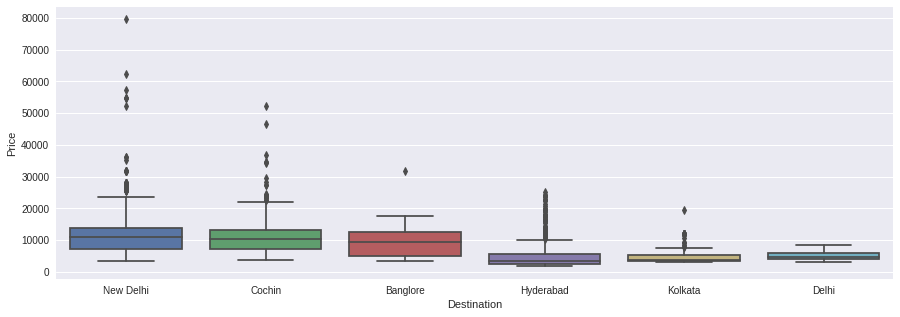

In [112]:
boxplot(df , 'Destination' , "Price")

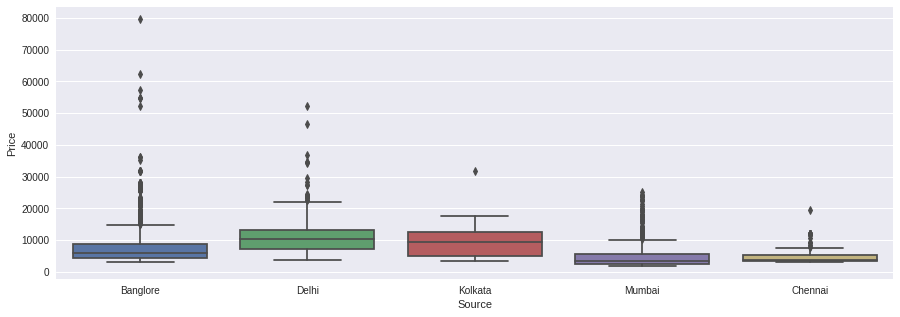

In [113]:
boxplot(df , 'Source' , "Price")

## onehot encoding

In [114]:
categorical_columns

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [115]:

Airline=pd.get_dummies(cat_df['Airline'] , drop_first = True)

Destination=pd.get_dummies(cat_df['Destination'] , drop_first = True)
# Airline=pd.get_dummies(cat_df['Airline'] , drop_first = True)
    

In [116]:
cat_df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info
...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info


In [117]:
drop_col(cat_df , 'Route')

In [118]:
cat_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,non-stop,No info
1,Air India,Kolkata,Banglore,2 stops,No info
2,Jet Airways,Delhi,Cochin,2 stops,No info
3,IndiGo,Kolkata,Banglore,1 stop,No info
4,IndiGo,Banglore,New Delhi,1 stop,No info


In [119]:
cat_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,non-stop,No info
1,Air India,Kolkata,Banglore,2 stops,No info
2,Jet Airways,Delhi,Cochin,2 stops,No info
3,IndiGo,Kolkata,Banglore,1 stop,No info
4,IndiGo,Banglore,New Delhi,1 stop,No info


In [120]:
cat_df.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
dtype: int64

In [121]:
cat_df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [122]:
stops = {'non-stop':0 , '2 stops':2 , '1 stop':1 , '3 stops':3 , '4 stops':4}

In [123]:
cat_df.Source.value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [124]:
cat_df.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [125]:
city = {'Delhi':'s_delhi' , 'Kolkata':'s_kolkata' ,'Banglore':'s_Banglore','Chennai':'Chennai', 'Mumbai':'Mumbai'}

In [126]:
cat_df['Source'] = cat_df['Source'].map(city)

In [127]:
cat_df['Total_Stops'] = cat_df['Total_Stops'].map(stops)

In [128]:
cat_df['Total_Stops'].value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

In [129]:
cat_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info
0,IndiGo,s_Banglore,New Delhi,0,No info
1,Air India,s_kolkata,Banglore,2,No info
2,Jet Airways,s_delhi,Cochin,2,No info
3,IndiGo,s_kolkata,Banglore,1,No info
4,IndiGo,s_Banglore,New Delhi,1,No info


In [130]:
cat_df.Source.value_counts()

s_delhi       4536
s_kolkata     2871
s_Banglore    2197
Mumbai         697
Chennai        381
Name: Source, dtype: int64

In [131]:
Source=pd.get_dummies(cat_df['Source'] , drop_first = True)

In [132]:
drop_col(cat_df, "Additional_Info")

In [133]:
cat_df.head()

,Airline,Source,Destination,Total_Stops
0,IndiGo,s_Banglore,New Delhi,0
1,Air India,s_kolkata,Banglore,2
2,Jet Airways,s_delhi,Cochin,2
3,IndiGo,s_kolkata,Banglore,1
4,IndiGo,s_Banglore,New Delhi,1


# final dataset

In [134]:
final_df = pd.concat([Airline , Source , Destination , cat_df , num_df] , axis = 1)

In [135]:
final_df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Mumbai,s_Banglore,s_delhi,s_kolkata,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Airline,Source,Destination,Total_Stops,Price,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,duration in hours,duration in minutes,journey_day,journey_month
0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,IndiGo,s_Banglore,New Delhi,0,3897,22,20,1,10,2,50,24,3
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,Air India,s_kolkata,Banglore,2,7662,5,50,13,15,7,25,5,1
2,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,Jet Airways,s_delhi,Cochin,2,13882,9,25,4,25,19,0,6,9
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,IndiGo,s_kolkata,Banglore,1,6218,18,5,23,30,5,25,5,12
4,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,IndiGo,s_Banglore,New Delhi,1,13302,16,50,21,35,4,45,3,1


In [136]:
final_df.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Mumbai', 's_Banglore',
       's_delhi', 's_kolkata', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi', 'Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'Dep_Time_hour', 'Dep_Time_min', 'Arrival_Time_hour',
       'Arrival_Time_min', 'duration in hours', 'duration in minutes',
       'journey_day', 'journey_month'],
      dtype='object')

In [137]:
for i in ['Airline' , 'Source' , 'Destination']:
    drop_col(final_df , i)

In [138]:
final_df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Mumbai,s_Banglore,s_delhi,s_kolkata,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_Stops,Price,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,duration in hours,duration in minutes,journey_day,journey_month
0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,3897,22,20,1,10,2,50,24,3
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,7662,5,50,13,15,7,25,5,1
2,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,2,13882,9,25,4,25,19,0,6,9
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,6218,18,5,23,30,5,25,5,12
4,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,13302,16,50,21,35,4,45,3,1


In [139]:
final_df.rename(columns = {'Air India':'Air_India',
 'Arrival_Time_hour':'Arrival_hour',
 'Arrival_Time_min':'Arrival_min',
 'Chennai':'s_Chennai',
 'Cochin':'d_Cochin',
 'Delhi':'d_Delhi',
 's_delhi':'s_Delhi',
 'Dep_Time_hour':'Dep_hour',
 'Dep_Time_min':'Dep_min',
 'GoAir':'GoAir',
 'Hyderabad':'d_Hyderabad',
 'IndiGo':'IndiGo',
 'Jet Airways':'Jet_Airways',
 'Jet Airways Business':'Jet_Airways_Business',
 's_kolkata':'s_Kolkata',
 'Kolkata':'d_Kolkata',
 'Multiple carriers':'Multiple_carriers',
 'Multiple carriers Premium economy':'Multiple_carriers_Premium_economy',
 'Mumbai':'s_Mumbai',
 'New Delhi':'d_New_Delhi',
 'Price':'Price',
 'SpiceJet':'SpiceJet',
 'Total_Stops':'Total_stops',
 'Trujet':'Trujet',
 'Vistara':'Vistara',
 'Vistara Premium economy':'Vistara_Premium_economy',
 'duration in hours':'dur_hour',
 'duration in minutes':'dur_min',
 'journey_day':'Journey_day',
 'journey_month':'Journey_month'},inplace = True)

In [140]:
final_df.columns

Index(['Air_India', 'GoAir', 'IndiGo', 'Jet_Airways', 'Jet_Airways_Business',
       'Multiple_carriers', 'Multiple_carriers_Premium_economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara_Premium_economy', 's_Mumbai',
       's_Banglore', 's_Delhi', 's_Kolkata', 'd_Cochin', 'd_Delhi',
       'd_Hyderabad', 'd_Kolkata', 'd_New_Delhi', 'Total_stops', 'Price',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'dur_hour',
       'dur_min', 'Journey_day', 'Journey_month'],
      dtype='object')

## outliers detection

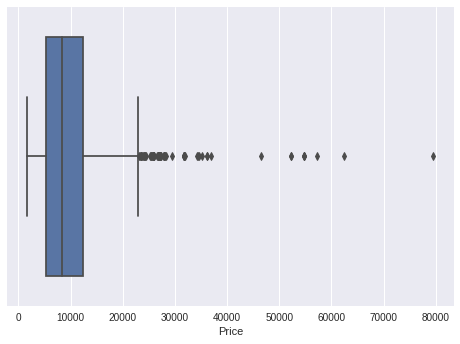

In [141]:
sns.boxplot(final_df['Price'])

In [142]:
final_df['Price'] = np.where(final_df["Price"]>=40000 , final_df["Price"].mean() , final_df["Price"])

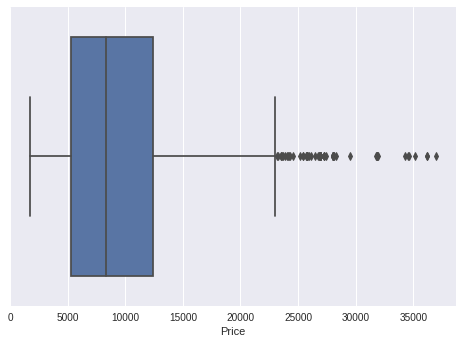

In [143]:
sns.boxplot(final_df['Price'])

## train test split

In [144]:
X = final_df.drop('Price',axis = 1)
y = final_df['Price']
print(X.shape)
print(y.shape)

(10682, 29)
(10682,)


In [145]:
from sklearn.model_selection import train_test_split

In [146]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.2 ,random_state = 42)

In [147]:
X_train.head()

,Air_India,GoAir,IndiGo,Jet_Airways,Jet_Airways_Business,Multiple_carriers,Multiple_carriers_Premium_economy,SpiceJet,Trujet,Vistara,Vistara_Premium_economy,s_Mumbai,s_Banglore,s_Delhi,s_Kolkata,d_Cochin,d_Delhi,d_Hyderabad,d_Kolkata,d_New_Delhi,Total_stops,Dep_hour,Dep_min,Arrival_hour,Arrival_min,dur_hour,dur_min,Journey_day,Journey_month
10005,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,8,30,19,15,10,45,27,5
3684,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,11,30,12,35,25,5,5,9
1034,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,15,45,22,5,6,20,24,4
3909,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,12,50,1,35,12,45,21,3
3088,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,2,17,15,19,15,26,0,24,6


## features selection

In [148]:
from sklearn.feature_selection import mutual_info_regression

In [149]:
mutual_info_regression(X,y)

array([0.29756215, 0.0442399 , 0.3544346 , 0.54332997, 0.01025798,
       0.27048738, 0.00574415, 0.19982143, 0.00418646, 0.13956675,
       0.        , 0.20490108, 0.39020162, 0.52945947, 0.45887857,
       0.52800898, 0.32830325, 0.20162761, 0.14354787, 0.1739097 ,
       0.78829526, 0.33151501, 0.26551205, 0.40910354, 0.35032718,
       0.46956681, 0.34942038, 0.1884777 , 0.24239323])

In [150]:
features_df = pd.DataFrame(mutual_info_regression(X,y) , index = X.columns)


In [151]:
features_df

,0
Air_India,0.298959
GoAir,0.048541
IndiGo,0.360742
Jet_Airways,0.540291
Jet_Airways_Business,0.004202
Multiple_carriers,0.261342
Multiple_carriers_Premium_economy,0.012215
SpiceJet,0.190105
Trujet,0.000000
Vistara,0.138550


In [152]:
features_df.columns = ['importance']
features_df

,importance
Air_India,0.298959
GoAir,0.048541
IndiGo,0.360742
Jet_Airways,0.540291
Jet_Airways_Business,0.004202
Multiple_carriers,0.261342
Multiple_carriers_Premium_economy,0.012215
SpiceJet,0.190105
Trujet,0.000000
Vistara,0.138550


In [153]:
features_df.sort_values('importance',ascending=False)

,importance
Total_stops,0.792095
Jet_Airways,0.540291
s_Delhi,0.529005
d_Cochin,0.511774
dur_hour,0.477920
s_Kolkata,0.462125
Arrival_hour,0.409295
s_Banglore,0.387765
IndiGo,0.360742
dur_min,0.347800


## model predictions

In [154]:
from sklearn import metrics
import pickle
def predict(ml_model,dump =0 ):
    model = ml_model.fit(X_train ,y_train)
    print(f'training score is : {model.score(X_train ,y_train)}')
    predictions = model.predict(X_test)
    print(f"testing score is :{model.score(X_test,y_test)}")
    print(f'r2_score is: {metrics.r2_score(predictions , y_test)}')
    print(f'mean sqaure error is: {metrics.mean_squared_error(predictions , y_test)}')
    sns.distplot(predictions - y_test)
    if dump ==1:
        file = open("model.pkl",'wb')
        pickle.dump(model,file)


In [155]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score


In [156]:
reg_model = RandomForestRegressor()

training score is : 0.9518619107592283
testing score is :0.8265387524221093
r2_score is: 0.8019896772341677
mean sqaure error is: 3552403.642742211


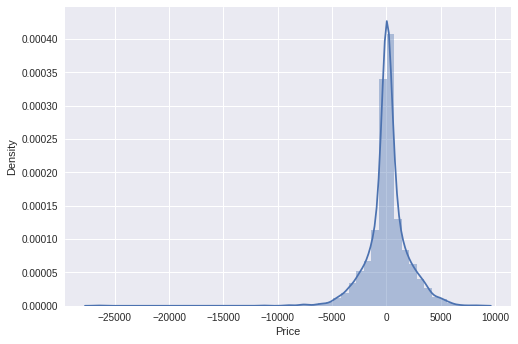

In [157]:
predict(RandomForestRegressor())

## hypertune model

In [158]:
from sklearn.model_selection import RandomizedSearchCV

In [159]:
n_estimators = [int(x) for x in np.linspace(50,1200,num = 6)]
max_depth = [int(x) for x in np.linspace(5,30 , num = 4)]

In [160]:
random_grid = {
    'n_estimators':n_estimators,
    'max_features':['auto','sqrt'],
    'max_depth':max_depth,
    'min_samples_split':[5,10,15,100]
}

In [161]:
random_grid

{'max_depth': [5, 13, 21, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [5, 10, 15, 100],
 'n_estimators': [50, 280, 510, 740, 970, 1200]}

In [162]:
random_cv = RandomizedSearchCV(estimator=reg_model , param_distributions=random_grid , verbose=2,cv = 3 , n_jobs=-1)

In [163]:
random_cv.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.1min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [164]:
random_cv.best_params_

{'max_depth': 30,
 'max_features': 'auto',
 'min_samples_split': 10,
 'n_estimators': 510}

In [165]:
pred = random_cv.predict(X_test)

In [166]:
metrics.r2_score(pred,y_test)

0.8174619864590695

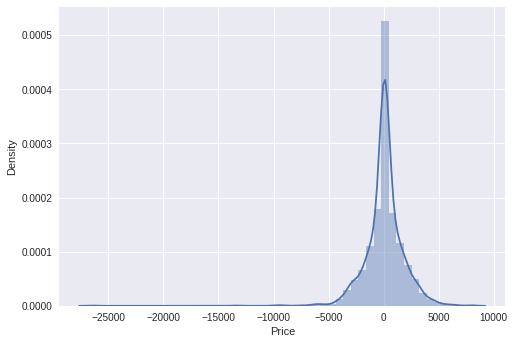

In [167]:
sns.distplot(pred-y_test)

In [168]:
X_test.columns

Index(['Air_India', 'GoAir', 'IndiGo', 'Jet_Airways', 'Jet_Airways_Business',
       'Multiple_carriers', 'Multiple_carriers_Premium_economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara_Premium_economy', 's_Mumbai',
       's_Banglore', 's_Delhi', 's_Kolkata', 'd_Cochin', 'd_Delhi',
       'd_Hyderabad', 'd_Kolkata', 'd_New_Delhi', 'Total_stops', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'dur_hour', 'dur_min',
       'Journey_day', 'Journey_month'],
      dtype='object')

## dumping model

In [170]:
file = open("flight_random_cv.pkl",'wb')
pickle.dump(random_cv,file)

In [172]:
model = open('flight_random_cv.pkl','rb')
forest = pickle.load(model)

In [174]:
y_prediction = forest.predict(X_test)

In [177]:
metrics.r2_score(y_prediction , y_test)

0.8174619864590695